# Проект по методам оптимизации


## Использование генетических алгоритмов для поиска оптимального решения


### Горская Елена, 695

### Постановка задачи

Рассмотрим следующую постановку задачи: у нас имеется функция (в данной работе рассматриваются функции двух переменных), для которой необходимо найти минимум. Одним из способов нахождения оптимума являются генетические алгоритмы. В данной работе рассмотрена реализация некоторых вариаций генетических алгоритмов и продемонстрирована их работа на нескольких примерах. Также произведен анализ поведения и эффективности генетических алгоритмов, рассмотрены достоинства и недостатки каждой из реализаций и класса генетических алгоритмов в целом.

### Основные понятия

Для начала попытаемся понять, что из себя представляют генетические алгоритмы. Они являются одной из разновидностей алгоритмов поиска (вообще говоря, это эвристический алгоритм поиска) и используются в том числе и для решения задач оптимизации. При решении данных задач используются методы, схожие с теми, которые встречаются в естественном отборе:
* отбор: мы выбираем из популяции долю тех, кто "пойдёт дальше".
* наследование: передача некоторых свойств, признаков, информации следующему поколению.
* скрещивание: создание нового поколения.
* мутации: из всей популяции выбирается некоторое количество особей (особь = пробное решение), характеристики которых изменяются в соответствии с определенными операциями - происходит их мутация.

Идея данных алгоритмов такая же, как и в естественном отборе в ходе эволюции: у нас есть какое-то количество особей, находящихся во враждебной среде, которые могут скрещиваться и передавать потомкам часть своих генов, а уже наиболее приспособленные потомки будут выживать.

В задаче оптимизации у нас задана функция приспособленности (fitness function). Это вещественная либо целочисленная функция одной или нескольких переменных, которую нам и нужно оптимизировать в ходе генетического алгоритма. Она направляет эволюцию в сторону правильного (оптимального) решения. Функция приспособленности является одним из частных случаев целевой функции.

Итак, попробуем формализовать сказанное выше и описать, из чего состоит простейший генетический алгоритм.
<br> Пусть у нас есть функция приспособленности $f$, заданная на множестве $P$, которую нужно минимизировать.

Алгоритм будет устроен так:

* Мы выбираем функцию скрещивания $C$ и функцию мутации $M$, где функция $C$ принимает на вход два аргумента (в более общем случае, функция скрещивания может принимать 3 и более аргументов), а выдает один, в то время как функция $M$ принимает на вход один аргумент и выдает также один аргумент:
<br> $C: P \times P \rightarrow P$, $M: P \rightarrow P$
* Выбираем начальную популяцию $A \subseteq P$, такую что $|A| = m$
<br> Обычно начальная популяция генерируется случайно. Важно, чтобы у нас было относительное разнообразие особей, чтобы популяция не пришла просто в ближайший экстремум.
* Строим множество потомков: $D = \{ C(x,y)$ $| $ $x, y \in A \}$
* Строим множество мутантов: $X = \{ M(x)$ $| $ $x \in A \}$
* Рассматриваем множество $A \cup D \cup X$ и сортируем его по возрастанию значений функции $f$, а затем отбираем первые (лучшие) $m$ элементов, которые составят новую популяцию $A$. После этого вновь переходим к третьему шагу.

Какие мы можем рассматривать критерии остановки:
* Значение функции $f$ достаточно мало: $min$ $f(x) < \epsilon$, где $x \in A_{current}$. В данном случае мы рассматриваем текущее множество $A$ (текущую популяцию).
* Полученная на очередном шаге популяция оказалась не намного лучше той, которая была на предыдущем шаге:
<br> $\large{min_{x \in A_{current}} f(x) \geq 0.99 }$ $\large{min_{x \in A_{previous}} f(x)}$.
* Мы сделали уже довольно большое количество шагов (исчерпали число поколений, отпущенных на эволюцию).

Какие функции скрещивания мы можем использовать:
* Так как довольно часто мы говорим про $R^{n}$, то можно брать $C(x,y) = \frac{x+y}{2}$
* Если мы говорим, например, про $R^2$, то можно брать $C((x_1, y_1), (x_2, y_2)) = (x_1, y_2)$
* Очень часто зависит от задачи: "хорошие гены" мы определяем в зависимости от условия
 
Какие функции мутации мы можем использовать:
* Например, если мы ищем минимум в $R^{n}$, то в качестве функции мутации можно выбирать замену произвольной случайно выбранной координаты $(x_1,...,x_n)$ на другую произвольную координату.
* Можно расположить координаты в противоположном порядке: $M(x_1,...,x_n) = (x_n,...,x_1)$

Когда мы можем применять мутацию:
* До скрещивания - то есть только к начальной популяции.
* После скрещивания - то есть еще и к потомкам.

Более того, иногда может мутировать вся популяция, а иногда лишь определенная (и заранее заданная) ее часть.

В целом, оператор мутации по сравнению с оператором скрещивания играет второстепенную роль. В классическом генетическом алгоритме скрещивание используется практически всегда, в то время как мутации могут и не использоваться (более того, используются мутации не слишком часто).

Мы рассмотрим как алгоритм с использованием функции мутации, так и без использования данной функции.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import random
import math

Рассмотрим несколько функций двух переменных, которые мы хотим минимизировать.

In [3]:
def func_1(x, y):
    res_1 = x**2 + (y-1) ** 2 + 1
    return res_1

def func_2(x, y):
    res_2 = x**4 + y**4 - 2 * (x**2) + 4*x*y - 2 * (y**2) - 1
    return res_2

def func_3(x, y):
    res_3 = abs(x)* abs(math.sin(x / 10))
    return res_3

def func_4(x, y=0):
    if x<=-6:
        res = -x-8
    elif ((x>-6) and (x<=0)):
        res = x/3
    elif ((x>0) and (x<=10)):
        res = -x/2
    else:
        res = x-15
    return res

### Классический генетический алгоритм без использования мутаций. 

Рассматриваем функцию 2-х переменных, например первую $func_1$

В первой части нашего исследования мы реализуем классический генетический алгоритм без использования мутаций.
<br> Первый этап: случайно генерируем начальную популяцию и задаем фитнесс-функцию.
<br> Критерий остановки: пройденное количество шагов (100).
<br> Функция скрещивания: поскольку мы работаем в двумерном пространстве, то в ходе скрещивания наследник со случайной вероятностью $p$ получает первую координату от первого родителя, а вторую - от второго. 
<br> Создание новой популяции: рассматриваем наследников каждой пары точек, чтобы не упустить возможный оптимум.

In [4]:
#в данном случае критерием остановки у нас будет пройденное число шагов
steps = 100

In [5]:
#создание начальной популяции
def create_population(n):
    population = np.random.uniform(low = -100.0, high = 100.0, size=(n,2)).tolist()
    return population

In [6]:
#кроссинговер 
def crossover(a, b):
    #генерируем случайное число в промежутке от 0 до 1
    p = random.random()
    
    #с вероятностью p новый индивид унаследует первый ген от первого родителя и второй - от второго
    res_x = p*a[0] + (1 - p) * b[0]
    res_y = (1 - p) * a[1] + p * b[1]
    res_total =[res_x, res_y]
    return res_total

In [7]:
#создание наследников - скрещивание
def create_descendants(population, n):
    d_population = []
    counter = 0
    for i in np.arange(0, n):
        for j in np.arange(0, n):
            #чтобы не повторяться
            if j > i:
                child = crossover(population[i], population[j])
                d_population.append(child)
                #увеличиваем счетчик
                counter = counter + 1
    return d_population

In [8]:
#выборка лучших представителей и сокращение популяции
def reduction(population, n):
    f_values = [func_1(item[0], item[1]) for item in population]
    res = np.argsort(f_values)
    res = res[:n]
    new_population = np.array(population)[res]
    return new_population.tolist()

In [89]:
#основная функция, представляющая всю эволюцию
def evolution(n):
    species = create_population(n)
    counter = 0
    evol_arr = np.zeros(steps)
    while counter < steps:
        d_species = create_descendants(species, n)
        best_d_species = reduction(d_species, n)
        all_species = np.vstack((species, best_d_species))
        species = reduction(all_species, n)
        evol_arr[counter] = np.min([func_1(item[0], item[1]) for item in species])
        counter = counter + 1
    return evol_arr

*Случай 1:* Положим, размер популяции равным 50. Это и даст необходимую точность, и не приведет к излишне долгим вычислениям. Рассмотрим массив результатов, каждый $i-$й элемент которого представляет собой минимум целевой функции $func_1$ на $i-$ом шаге:

In [53]:
res_simple = evolution(50)

Выведем последний элемент, представляющий собой окончательный результат.

In [76]:
print ("Найденный минимум при помощи классического ГА без мутаций, популяция из 50 особей:")
res_simple[99]

Найденный минимум при помощи классического ГА без мутаций, популяция из 50 особей:


1.0

Как мы видим, точность результата довольно большая. Более того, мы с большой точностью достигли нужного результата: если теоретическим образом вычислить минимум рассматриваемой функции, то мы получим как раз единицу.

Построим график:

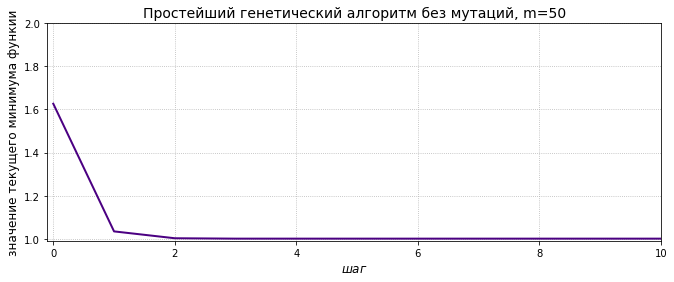

In [83]:
grid = np.linspace(0, steps, steps+1) 
plt.figure(figsize=(11, 4))

plt.plot(res_simple, color = 'indigo', linewidth = 2)

plt.grid(ls=':')
plt.ylim(0.99, 2)
plt.xlim(-0.1, 10)
plt.xlabel('$шаг$', fontsize=12)
plt.ylabel('значение текущего минимума функии', fontsize=12)   
plt.title("Простейший генетический алгоритм без мутаций, m=50", 
          fontsize=14)
plt.show()

Как мы видим, значение действительно уменьшается с течением времени и оптимум уже с довольно хорошей точностью достигался на втором шаге. 

*Случай 2:* Положим теперь размер популяции равным 5. 

In [43]:
res_simple_add = evolution(5)

Выведем последний элемент, представляющий собой окончательный результат.

In [77]:
print ("Найденный минимум при помощи классического ГА без мутаций, популяция из 5 особей, случай 2.1:")
res_simple_add[99]

Найденный минимум при помощи классического ГА без мутаций, популяция из 5 особей, случай 2.1:


1.0000078055698107

Как мы можем заметить, точность результата уже стала заметно меньше. 

Построим график:

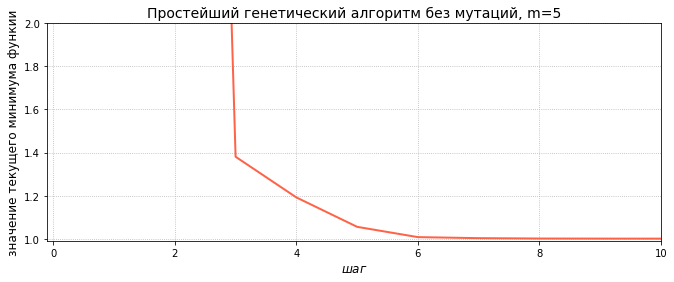

In [82]:
grid = np.linspace(0, steps, steps+1) 
plt.figure(figsize=(11, 4))

plt.plot(res_simple_add, color = 'tomato', linewidth = 2)

plt.grid(ls=':')
plt.ylim(0.99, 2)
plt.xlim(-0.1, 10)
plt.xlabel('$шаг$', fontsize=12)
plt.ylabel('значение текущего минимума функии', fontsize=12)   
plt.title("Простейший генетический алгоритм без мутаций, m=5", 
          fontsize=14)
plt.show()

In [71]:
#запускаем еще раз
res_simple_add_2 = evolution(5)

In [74]:
print ("Найденный минимум при помощи классического ГА без мутаций, популяция из 5 особей, случай 2.2:")
res_simple_add_2[99]

Найденный минимум при помощи классического ГА без мутаций, популяция из 5 особей, случай 2.2:


2.2419270599473915

Итак, сравним случаи $1$ и $2$. В первом случае мы рассматривали размер популяции, равный $50$, во втором же случае он был в $10$ раз меньше и равнялся $5$. Как можно отметить по графику, во втором случае алгоритм сходился за большее число шагов, он достиг более-менее точного результата только при $7-8$ шагах, в то время как в первом случае нам хватило двух. Более того, полученный нами ответ оказался менее точным, чем в первом случае, хотя общее количество шагов и было одинаковым.
<br> Однако в то же время в первом случае размер популяции был $50$, так что в ходе сортировки до того, как мы достигли приемлемого результата, мы перебрали $50*2 = 100$ особей (пробных решений), где $2$ - число шагов, $50$ - размер популяции, в то время как во втором случае это число составило $5*8=40$. И все же во втором случае алгоритм мог и не сойтись, поскольку размер популяции очень маленький, так что если бы на начальном шаге мы сгенерировали популяцию неудачно, то к нимимуму могли бы и не прийти, что нам и демонстрируем второй случай, когда мы получили значение, равное $2.24$.
<br> Итак, с одной стороны уменьшение размера начальной популяции уменьшило и точность, однако с другой стороны сильное увеличение размера популяции могло привести к большему времени работы, ведь нам бы пришлось скрещивать всех представителей, а при большом размере начальной популяции это заняло бы немало времени.
<br> Подводя итог, стоит заметить, что важно подобрать хороший размер начальной популяции, который предоставлял бы и необходимую точность, и в то же время не сильно увеличивал бы время работы. Данный размер может зависеть от задачи, поэтому в большинстве случаев программисту приходится задавать его самостоятельно.

### Классический генетический алгоритм с использованием мутаций. 

Во второй части нашего исследования мы реализуем классический генетический алгоритм с использованием мутаций.
<br> Критерий остановки и функция скрещивания остаются прежними.
<br> Мутация: в данном случае нам надо отметить две вещи: кто мутирует и как мутирует. Подвергать мутации мы будем только родителей. Таким образом, считаем, что вначале произошло скрещивание (в ходе которого характеристики родителей оставались неизменными), а затем произошла мутация, которая воздействовала только на старое поколение. Мы рассматриваем точки в двумерном пространстве, поэтому применим мутацию, которая будет случайным образом менять, например, вторую координату выбранной точки.

Добавляем мутацию:

In [90]:
def mutation(a):
    b = [0, 0]
    b[0] = a[0]
    b[1] = np.random.rand()
    return b

In [91]:
def muted_evolution(n):
    species = create_population(n)
    counter = 0
    evol_arr = np.zeros(steps)
    while counter < steps:
        d_species = create_descendants(species, n)
        best_d_species = reduction(d_species, n)
        m_species = mutation(species)
        all_species = np.vstack((species, best_d_species))
        all_species_muted = np.vstack((all_species, m_species))
        species = reduction(all_species, n)
        evol_arr[counter] = np.min([func_1(item[0], item[1]) for item in species])
        counter = counter + 1
        
    return evol_arr

Положим, размер популяции равным 50. 

In [92]:
res_muted = muted_evolution(50)

Выводим результат:

In [93]:
print ("Найденный минимум при помощи классического ГА с мутацией:")
res_muted[49]

Найденный минимум при помощи классического ГА с мутацией:


1.0

Как и в предыдущем случае, построим график:

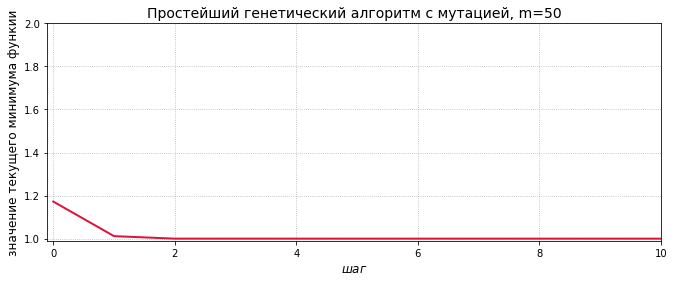

In [94]:
grid = np.linspace(0, steps, steps+1) 
plt.figure(figsize=(11, 4))

plt.plot(res_muted, color = 'crimson', linewidth = 2)

plt.grid(ls=':')
plt.ylim(0.99, 2)
plt.xlim(-0.1, 10)
plt.xlabel('$шаг$', fontsize=12)
plt.ylabel('значение текущего минимума функии', fontsize=12)   
plt.title("Простейший генетический алгоритм с мутацией, m=50", 
          fontsize=14)
plt.show()

Как мы видим, значение действительно уменьшается с течением времени, причем быстрее, чем в предыдущем случае (без использования мутации). 
<br> Почему это происходит? Когда мы включаем в наш алгоритм мутацию, мы увеличиваем множество принимаемых функцией значений, а затем выбираем из них все то же число наилучших, что и в первом случае. Однако теперь выбор значений у нас больше, так что и сойтись мы можем быстрее.
<br> Однако с другой стороны, мутация хотя и позволяет алгоритму сойтись за меньшее число шагов до нужной точности, она также влияет на время работы: при использовании мутации алгоритм будет работать дольше, ведь нам нужно вычислить еще одну дополнительную функцию от всей начальной популяции, а потом еще добавить множество ее значений к числу тех, из которых надо выбрать лучших.

### Альтернативный критерий остановки

В третьей части нашей работы мы рассмотрим другой критерий остановки: сходимость по значению функции. Мы заранее задаем необходимую точность, и когда разность значений функции на двух соседних шагах будет меньше заданного значения, тогда мы и остановимся.

Рассмотрим функцию $func_2$. К ней применим, например алгоритм без использования мутаций. В решении надо будет изменить всего две функции, внутри которых использовалась целевая функция:

In [34]:
#выборка лучших представителей и сокращение популяции
def reduction_2(population, n):
    f_values = [func_2(item[0], item[1]) for item in population]
    res = np.argsort(f_values)
    res = res[:n]
    new_population = np.array(population)[res]
    return new_population.tolist()

Попробуем также другой критерий остановки, в котором сравниваем два последующих значения функции:

In [35]:
#желаемая точность
eps = 0.0000001

#основная функция, представляющая всю эволюцию
def evolution_f(n):
    species = create_population(n)
    counter = 0
    f_evol_arr = np.zeros(10)
    #для начала ставим текущему и предыдущему значениям функции большие значения, причем различные
    f_curr = 9000
    f_prev = 8000
    
    while (abs(f_prev - f_curr) > eps):
        d_species = create_descendants(species, n)
        best_d_species = reduction_2(d_species, n)
        all_species = np.vstack((species, best_d_species))
        species = reduction_2(all_species, n)
        f_prev = f_curr
        f_curr = np.min([func_2(item[0], item[1]) for item in species])
        f_evol_arr[counter] = f_curr
        counter = counter + 1
    return f_curr, counter-1, f_evol_arr

In [36]:
res_simple_2 = evolution_f(50)

In [37]:
print ("Полученный минимум: ", res_simple_2[0])
print ("Потребовавшееся число итераций: ", res_simple_2[1])

Полученный минимум:  -8.999999999956092
Потребовавшееся число итераций:  7


Это полностью согласовано с теоретическими расчетами, потому что минимум данной функции будет $-9$, что мы и получили в пределах погрешности.

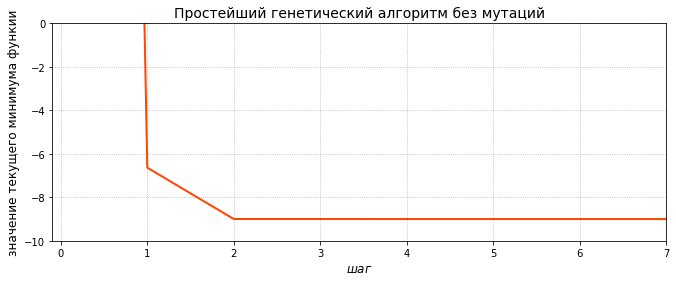

In [38]:
grid = np.linspace(0, 10, 11) 
plt.figure(figsize=(11, 4))

plt.plot(res_simple_2[2], color = 'orangered', linewidth = 2)

plt.grid(ls=':')
plt.ylim(-10, 0)
plt.xlim(-0.1, 7)
plt.xlabel('$шаг$', fontsize=12)
plt.ylabel('значение текущего минимума функии', fontsize=12)   
plt.title("Простейший генетический алгоритм без мутаций", 
          fontsize=14)
plt.show()

Теперь запустим для этой же функции алгоритм с мутацией и с этим же критерием остановки:

In [39]:
#желаемая точность
eps = 0.0000001

def muted_evolution_f(n):
    species = create_population(n)
    counter = 0
    f_evol_arr = np.zeros(10)
    
    #для начала ставим текущему и предыдущему значениям функции большие значения, причем различные
    f_curr = 9000
    f_prev = 8000
    
    while (abs(f_prev - f_curr) > eps):
        d_species = create_descendants(species, n)
        best_d_species = reduction_2(d_species, n)
        m_species = mutation(species)
        all_species = np.vstack((species, best_d_species))
        all_species_muted = np.vstack((all_species, m_species))
        species = reduction_2(all_species, n)
        f_prev = f_curr
        f_curr = np.min([func_2(item[0], item[1]) for item in species])
        f_evol_arr[counter] = f_curr
        counter = counter + 1
        
    return f_curr, counter - 1, f_evol_arr

In [40]:
res_muted_2 = muted_evolution_f(50)

In [41]:
print ("Полученный минимум: ", res_muted_2[0])
print ("Потребовавшееся число итераций: ", res_muted_2[1])

Полученный минимум:  -8.999999984875528
Потребовавшееся число итераций:  6


Как мы видим, ответ снова получился очень близкий к правильному.

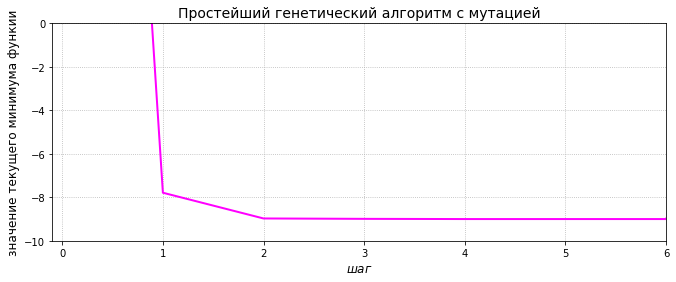

In [43]:
grid = np.linspace(0, 10, 11) 
plt.figure(figsize=(11, 4))

plt.plot(res_muted_2[2], color = 'magenta', linewidth = 2)

plt.grid(ls=':')
plt.ylim(-10, 0)
plt.xlim(-0.1, 6)
plt.xlabel('$шаг$', fontsize=12)
plt.ylabel('значение текущего минимума функии', fontsize=12)   
plt.title("Простейший генетический алгоритм с мутацией", 
          fontsize=14)
plt.show()

Данный случай наглядно демонстирует нам, что при использовании мутаций мы можем сойтись быстрее, нежели без использования мутаций. Действительно, в первом случае мы пришли к решению за 7 шагов, а во втором - уже за 6. Кроме того, второй алгоритм работал также довольно быстро, не дольше первого. 
<br> Поэтому выбор между решением с мутацией и решением без использования мутаций - это еще одна задача, которая ложится на плечи программиста, и в зависимости от программы нам нужно решить, что именно мы хотим: более быструю сходимость или же более быстрое время ряботы. Кроме того, мутацию также нужно хорошо подобрать, потому что если ее выбрать неэффективно, то время работы увеличится, а вот результат лучше не станет.

**Сравним эти два критерия остановки**

Когда мы заранее задаем количество итераций, то не можем предсказать, насколько точное решение получим. Например, с нашим числом итераций получилась очень большая точность, что с одной стороны очень хорошо, потому что ответ получился точный, но с другой стороны алгоритм работал относительно долго (в 6-8 раз дольше, чем во втором случае, когда критерием был модуль разности значений полученных на двух соседних итерациях оптимумов), да и не факт, что в реальных задачах такая большая точность действительно нужна. Во втором случае, мы можем сами регулировать точность, да и алгоритм работает быстрее, но если, например, минимумом функции будет $- \infty$, то во втором случае может получиться так, что мы будем работать без остановки. Например, если будет точность в районе $0.01$, а значения минимумов на каждом из шагов будут убывать с большей скоростью и стремиться к $- \infty$, то ситуация получится не очень приятная. В случае же первого алгоритма мы гарантированно остановимся, когда совершим заданное число итераций. И в итоге в ответе получим, возможно, большое отрицательное число.

### Локальность генетического алгоритма


Покажем, что наш алгоритм может сходиться к локальному минимуму, а не к глобальному: 

Рассмотрим кусочно-заданную функцию: $func_4$, описанную выше.
<br> Построим график этой функции:

\begin{equation}
f(x) = 
 \begin{cases}
   -x-8, &\text{$x \leq -6$}\\
    \frac{x}{3}, &\text{$-6 < x \leq 0$}\\
    \frac{-x}{2}, &\text{$0 < x \leq 10$}\\
    x-15, &\text{$x>10$}
 \end{cases}
\end{equation}

Поскольку ранее мы рассматривали функцию двух переменных, то и здесь также рассматриваем функцию двух переменных, однако вторую переменную считаем "фиктивной", то есть значение функции от нее зависеть не будет. В данном случае именно на примере такой функции довольно явно можно продемонстировать локальную сходимость реализованного нами генетического алгоритма.

In [33]:
def function_4(x):
    y = np.zeros(len(x))
    y += (-x - 8) * (x <= -6)
    y += (x/3) * (x > -6) *(x<0)
    y += (-x/2) * (x>=0) * (x<=10)
    y += (x-15) * (x>10)
    return y

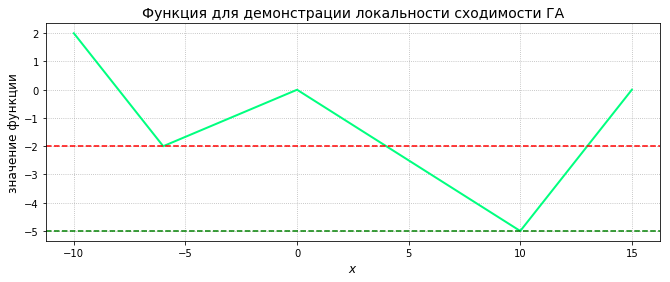

In [34]:
x = np.linspace(-10, 15, 1000)
y = function_4(x)
plt.figure(figsize=(11, 4))
plt.plot(x, y, color = 'springgreen', linewidth = 2)
plt.grid(ls=':')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('значение функции', fontsize=12)   
plt.title("Функция для демонстрации локальности сходимости ГА", 
          fontsize=14)
plt.axhline(y=-2, color='r', linestyle='--')
plt.axhline(y=-5, color='g', linestyle='--')
plt.show()

Как мы видим, у данной функции имеется в точке $10$ глобальный минимум $y_{min} = -5$, а в точке $-6$ локальный минимум $y_{loc} = -2$.
<br> Генетический алгоритм основан на случайности. Мы случайно генерируем начальную популяцию, затем потомки наследуют случайное количество генов каждого из родителей, мутация также происходит случайно. 
<br> Поэтому вполне может произойти такая ситуация, что начальная выборка получилась неудачная - все точки скопились около локального минимума. Тогда генетический алгоритм вполне может сойтись к нему, а не к глобальному оптимуму.

In [40]:
#выборка лучших представителей и сокращение популяции
def reduction_4(population, n):
    f_values = [func_4(item[0], item[1]) for item in population]
    res = np.argsort(f_values)
    res = res[:n]
    new_population = np.array(population)[res]
    return new_population.tolist()

In [41]:
#желаемая точность
eps = 0.00001

#основная функция, представляющая всю эволюцию
def evolution_4(species,  n):
    counter = 0
    
    #для начала ставим текущему и предыдущему значениям функции большие значения, причем различные
    f_curr = 9000
    f_prev = 8000
    
    while (abs(f_prev - f_curr) > eps):
        d_species = create_descendants(species, n)
        best_d_species = reduction_4(d_species, n)
        all_species = np.vstack((species, best_d_species))
        species = reduction_4(all_species, n)
        f_prev = f_curr
        f_curr = np.min([func_4(item[0], item[1]) for item in species])
        counter = counter + 1
    return f_curr, counter-1

In [42]:
#допустим, мы рассматриваем популяцию из 4 особей и случайно сгенерировали выборку:
bad_species = [[-8, -2], [-5.9, 0.3], [-6.4, 14], [-10, 18]]

In [43]:
#запускаем алгоритм
evolution_4(bad_species,  4)

(-1.9999987218437223, 7)

Как мы видим, мы сошлись за 7 шагов к локальному ($-2$), а не к глобальному ($-5$) минимуму, что подтвержает один из недостатков генетического алгоритма: мы не можем исключать ситуацию, в которой сойдемся к локальному оптимуму.

### Достоинства и недостатки генетических алгоритмов

**Достоинства:**
* Довольно часто генетические алгоритмы применяются в том случае, когда у нас очень большое пространство поиска. 
* Есть возможность варьировать параметры поиска (увеличивая затраты на время, можно выиграть в точности, и наоборот)
* Большой выбор функций мутации/скрещивания/отбора, что позволяет оптимизировать работу той или иной задачи в зависимости от необходимости.
* Работает заведомо не хуже абсолютно случайного поиска

**Недостатки:**
* Как мы выяснили, генетический алгоритм может сходиться не к глобальному, а к локальному оптимуму, а иногда и вообще к произвольной точке. Более того, сходимость генетических алгоритмов не доказана.
* Необходимо самостоятельно подбирать более эффективную функцию мутации/скрещивания для каждой задачи, поэтому работа с алгоритмом может превратиться в попытки подобрать наиболее удачные параметры.
* Иногда в генетическом алгоритме отсутствует разнообразие в особях. Достаточно быстро находится локальный минимум, и в дальшейшем все остальные элементы популяции проигрывают ему отбор. 
<br> Способ борьбы с этим: сделать так, чтобы в отборе участвовали не только самые приспособленные (лучшие) особи, но вообще все, что мы и сделали в нашей реализации. В таком случае вероятность того, что результаты получатся разнообразными, возрастает.
* В простых целевых функциях генетические алгоритмы проигрывает по скорости простым алгоритмам поиска.